# Flipkart A/B Testing – Conversion Rate Comparison

## 📌 Problem Statement
Flipkart ran an A/B test for a **new homepage banner**. They want to test if the new design (Version B) leads to a significantly higher **purchase conversion rate** than the current version (Version A).

## 🧠 5W1H

- **What**: Conversion rate (purchase made or not)
- **Why**: To evaluate the success of UI/UX changes
- **When**: Last 7-day campaign test
- **Where**: Nationwide sample
- **Who**: 10,000 users (5,000 per group)
- **How**: Z-Test for two proportions (Binary: Purchased = 1, Not Purchased = 0)


In [3]:
import pandas as pd
import numpy as np

np.random.seed(2025)

n = 10000
groups = ['A', 'B']
states = ['Delhi', 'Karnataka', 'Tamil Nadu', 'Gujarat', 'Maharashtra']
platforms = ['Mobile', 'Web', 'Smart TV']

df = pd.DataFrame({
    'User_ID': range(1, n+1),
    'State': np.random.choice(states, n),
    'Platform': np.random.choice(platforms, n),
    'Group': np.random.choice(groups, n, p=[0.5, 0.5]),
})

# Simulate conversion (A: 12%, B: 14%)
df['Purchased'] = df['Group'].apply(lambda x: np.random.binomial(1, 0.12) if x == 'A' else np.random.binomial(1, 0.14))

df.head()


,User_ID,State,Platform,Group,Purchased
0,1,Tamil Nadu,Smart TV,A,0
1,2,Maharashtra,Smart TV,B,0
2,3,Delhi,Smart TV,B,0
3,4,Gujarat,Mobile,B,0
4,5,Gujarat,Web,A,0


User_ID      0
State        0
Platform     0
Group        0
Purchased    0
dtype: int64
Group
A    0.123992
B    0.143849
Name: Purchased, dtype: float64


C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_11084\4082420416.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Group', y='Purchased', ci=None)


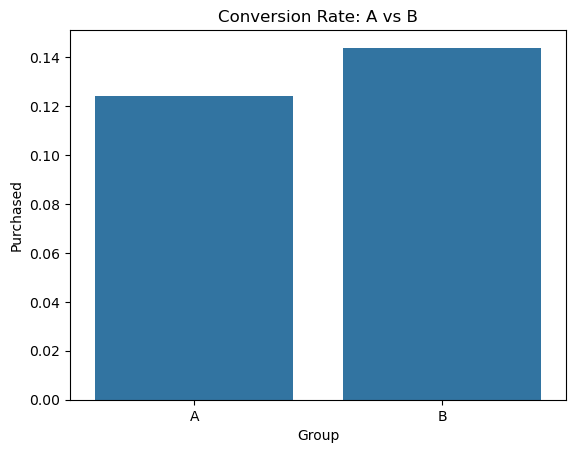

In [7]:
# Null check
print(df.isnull().sum())

# Conversion rates
conversion_rate = df.groupby('Group')['Purchased'].mean()
print(conversion_rate)

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Group', y='Purchased', ci=None)
plt.title("Conversion Rate: A vs B")
plt.show()


In [9]:
from statsmodels.stats.proportion import proportions_ztest

# Success counts
success_counts = df.groupby('Group')['Purchased'].sum().values
n_obs = df['Group'].value_counts().sort_index().values

# Z-Test
z_stat, p_val = proportions_ztest(count=success_counts, nobs=n_obs)

print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_val:.4f}")


Z-Statistic: -2.9145
P-Value: 0.0036


## 🎯 Hypotheses

- H₀: p_A = p_B → No difference in conversion rates
- H₁: p_A ≠ p_B → A significant difference exists

### 📈 Interpretation

- If **p < 0.05** → Reject H₀ → Banner B **does impact** conversions
- If **p ≥ 0.05** → Fail to reject H₀ → No strong evidence of a difference

## 💼 Business Impact

- ✅ If significant:
  - Roll out **Version B** to all users — it boosts conversions
  - A/B testing validated → similar experiments can optimize other features
- ❌ If not significant:
  - Keep Version A or redesign
  - Investigate deeper into segment-wise performance (state/platform)

